### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import tensorflow as tf
import re

### Reading Train.csv and Test.csv file

In [2]:
data_train = pd.read_csv('/content/train.csv')
data_test= pd.read_csv('/content/test.csv')

In [3]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [4]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


### Checking Shape of the Dataset

In [5]:
data_train.shape

(14999, 9)

In [6]:
data_test.shape

(8764, 8)

### Visualization

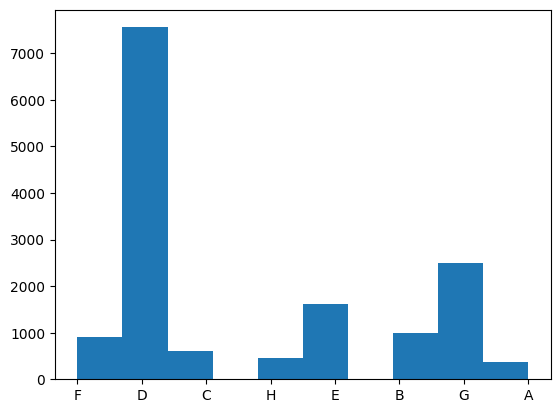

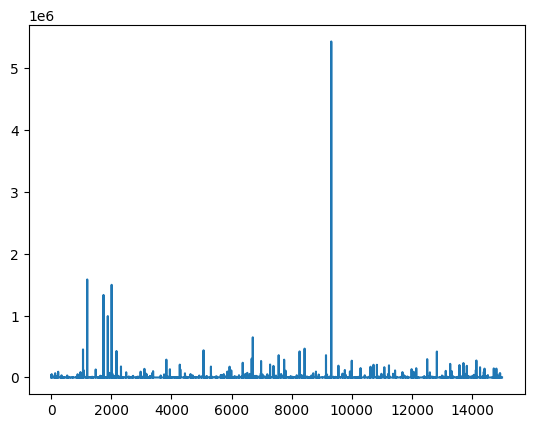

<ipython-input-7-e2c312c5c1e0>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_train.corr()
<ipython-input-7-e2c312c5c1e0>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask = np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


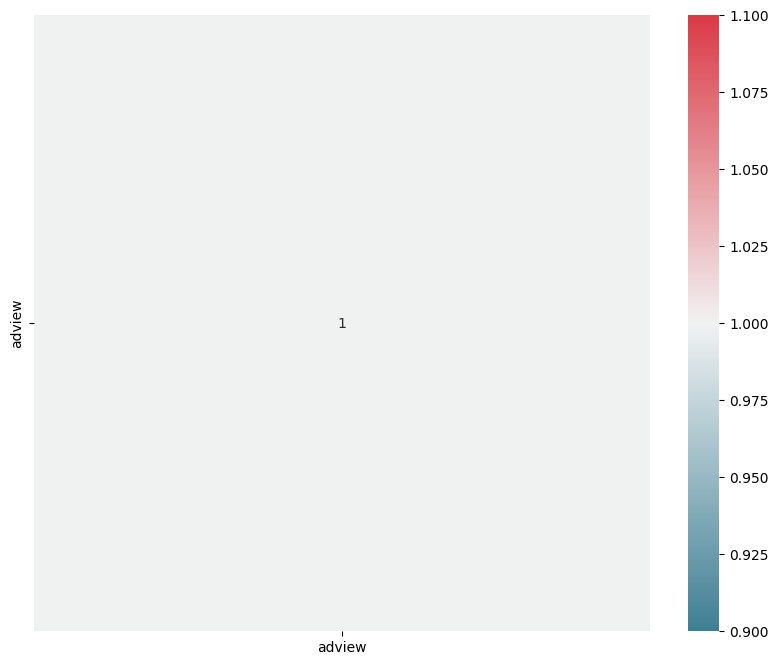

In [7]:
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)
plt.show()

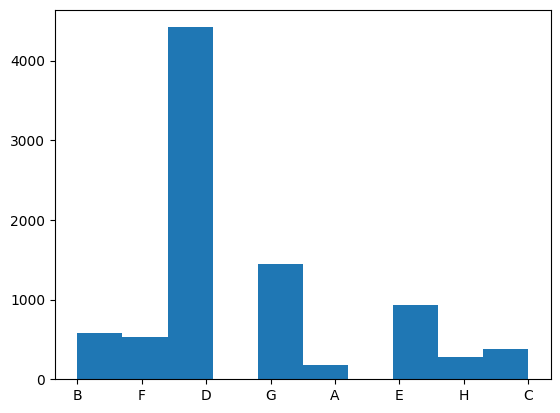

In [8]:
# Individual Plots
plt.hist(data_test["category"])
plt.show()

### Removing character "F" present in data

In [9]:
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [10]:
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


### Assigning each category a number for Category feature

In [11]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [12]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


### Converting values to integers for views, likes, comments, dislikes and adview

In [13]:
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']

In [14]:
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
column_vidid1=data_test['vidid']

### Converting Time_in_sec for duration

In [15]:
def getSeconds(x):
    pat =  re.compile('PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?')
    m = pat.match(str(x))
    return (int(m.group(1))*60*60 if m.group(1) else 0) + (int(m.group(2))*60 if m.group(2) else 0) + (int(m.group(3)) if m.group(3) else 0) if m else 0

data_train['duration'] = data_train['duration'].apply(getSeconds)
data_test['duration'] = data_test['duration'].apply(getSeconds)

### Converting date to Year published for published

In [16]:
def getYear(a):
     pat =  re.compile('(?:(\d+)-)?(?:(\d+)-)?(?:(\d+)-)?')
     n = pat.match(str(a))
     return (int(n.group(1))if n.group(1) else 0)
data_train['published'] = data_train['published'].apply(getYear)
data_test['published'] = data_test['published'].apply(getYear)

In [17]:
data_train.describe()

,adview,views,likes,dislikes,comment,published,duration,category
count,1.463600e+04,1.463600e+04,14636.000000,14636.000000,14636.000000,14636.000000,14636.000000,14636.000000
mean,1.695191e+03,7.107934e+05,2784.093946,254.150724,409.035597,2014.437346,1040.232441,4.607065
std,2.788993e+04,2.731062e+06,8936.295816,1029.257991,1511.180179,1.770455,2316.888900,1.576242
min,1.000000e+00,4.900000e+01,0.000000,0.000000,0.000000,2005.000000,0.000000,1.000000
25%,1.000000e+00,3.151425e+04,88.000000,7.000000,7.000000,2013.000000,187.000000,4.000000
50%,2.000000e+00,1.586610e+05,450.000000,38.000000,46.000000,2015.000000,325.000000,4.000000
75%,6.000000e+00,5.829575e+05,1861.500000,166.250000,224.000000,2016.000000,723.000000,6.000000
max,1.583846e+06,1.380479e+08,283824.000000,49449.000000,75045.000000,2017.000000,42317.000000,8.000000


### After Pre-processing

In [18]:
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016,457,6
1,VID_14135,2,1707,56,2,6,2016,570,4
2,VID_2187,1,2023,25,0,2,2016,136,3
3,VID_23096,6,620860,777,161,153,2016,262,8
4,VID_10175,1,666,1,0,0,2016,31,4


In [19]:
data_test.head()


,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017,449,2
1,VID_18629,1040132,8171,340,1047,2016,389,6
2,VID_13967,28534,31,11,1,2014,2274,4
3,VID_19442,1316715,2284,250,274,2010,595,7
4,VID_770,1893173,2519,225,116,2016,188,2


### Encoding features like Category, Duration, Vidid

In [20]:
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,11,453,6
1,2741,2,1707,56,2,6,11,566,4
2,8138,1,2023,25,0,2,11,132,3
3,9004,6,620860,777,161,153,11,258,8
4,122,1,666,1,0,0,11,27,4


In [21]:
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,12,438,2
1,3444,1040132,8171,340,1047,11,379,6
2,1593,28534,31,11,1,9,1375,4
3,3775,1316715,2284,250,274,5,581,7
4,7644,1893173,2519,225,116,11,178,2


### Visualization

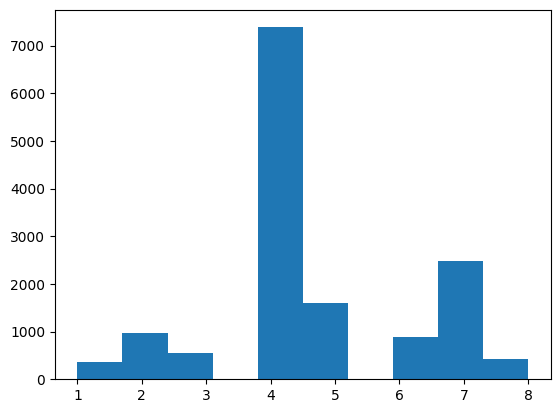

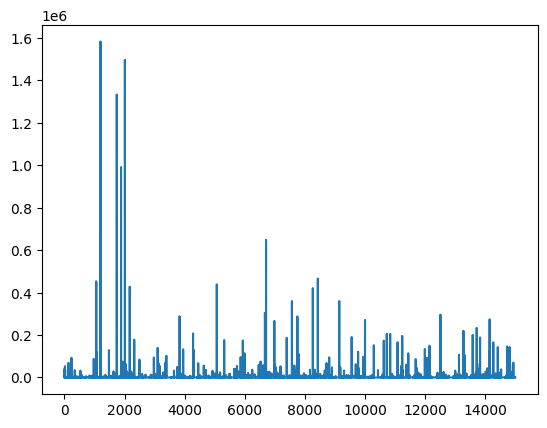

<ipython-input-22-e2c312c5c1e0>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask = np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


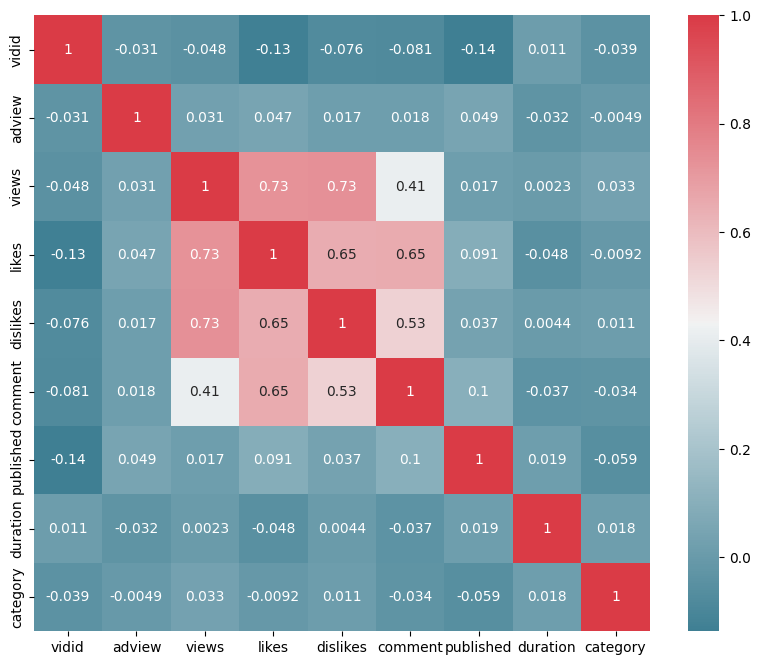

In [22]:
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)
plt.show()


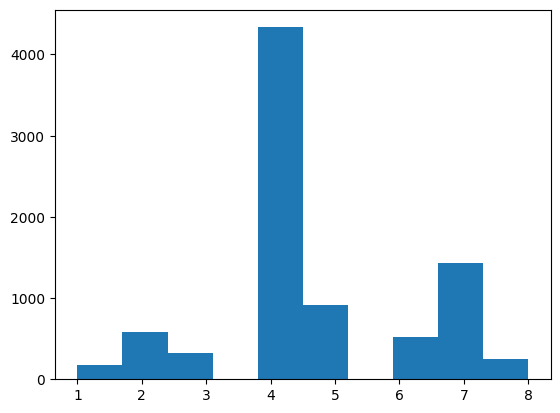

In [23]:
# Individual Plots
plt.hist(data_test["category"])
plt.show()

In [24]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,11,453,6
1,2741,2,1707,56,2,6,11,566,4
2,8138,1,2023,25,0,2,11,132,3
3,9004,6,620860,777,161,153,11,258,8
4,122,1,666,1,0,0,11,27,4


### Spliting Data

In [25]:
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
test_y = pd.DataFrame(data_test.iloc[:, 0].values, columns=['vidid'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_test = data_test.drop(['vidid'], axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,11,453,6
1,1707,56,2,6,11,566,4
2,2023,25,0,2,11,132,3
3,620860,777,161,153,11,258,8
4,666,1,0,0,11,27,4


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()
X_train.shape

(11708, 7)

### Normalising Data

In [27]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
data_test = scaler.transform(data_test)
X_train.mean()'''

'from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nX_train=scaler.fit_transform(X_train)\nX_test=scaler.fit_transform(X_test)\ndata_test = scaler.transform(data_test)\nX_train.mean()'

### Evaluation Metrics

In [28]:
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

### Linear Regression

In [29]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3568.3293112337924
Mean Squared Error: 831776621.7115474
Root Mean Squared Error: 28840.537819387962


### Support Vector Regressor

In [30]:
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, supportvector_regressor)

Mean Absolute Error: 1696.907208472624
Mean Squared Error: 833685357.6861739
Root Mean Squared Error: 28873.610056350313


### Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 2523.9439890710382
Mean Squared Error: 1064291568.898224
Root Mean Squared Error: 32623.481863501696


### Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth
                                      , min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 3125.6736824884806
Mean Squared Error: 848099748.9656154
Root Mean Squared Error: 29122.152203530826


In [33]:
random_forest.predict([[9876, 350, 400, 500, 2001, 5903, 123]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([14406.31098707])

In [34]:
random_forest.predict([[132345, 2343, 342423, 234, 2002, 5903, 123]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([8464.81250797])

### Ridge Regression

In [35]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
print_error(X_test,y_test, ridge)

Mean Absolute Error: 3568.313553385046
Mean Squared Error: 831776624.0453324
Root Mean Squared Error: 28840.537859848115


### Lasso Regression

In [36]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print_error(X_test,y_test, lasso)

Mean Absolute Error: 3568.3035095570285
Mean Squared Error: 831776539.2972206
Root Mean Squared Error: 28840.53639059476


### XGBoost

In [37]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)
print_error(X_test,y_test, xgb_model)

Mean Absolute Error: 3111.281210642206
Mean Squared Error: 775004363.9451182
Root Mean Squared Error: 27838.900192807872


### Saving & Loading Scikitlearn models

In [38]:
import pickle
pickle.dump(supportvector_regressor,open("model.pkl","wb"))

In [39]:
model = pickle.load(open('model.pkl',"rb"))

In [41]:
import pickle
pickle.dump(scaler,open("sc.pkl","wb"))

NameError: ignored

In [ ]:
scaling = pickle.load(open('sc.pkl',"rb"))

### Predicting

In [ ]:
preds = model.predict(data_test)
preds = preds.astype(np.int16)
preds = preds.reshape(1, -1)[0].tolist()

### Creating Predictions.csv File

In [ ]:
d = {'adview': preds}
pd.DataFrame(d).to_csv('prediction.csv', index=False)